<a href="https://colab.research.google.com/github/weymouth/NumericalPython/blob/main/DataFrameCurveFitExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is a more advanced example using a [data frame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) to create and store a set of measurements with some random noise added on. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.DataFrame({'time':np.linspace(0,2)})
data['y perfect'] = np.exp(1)+np.pi*data.time
data['y'] = data['y perfect']+np.random.normal(size=len(data.time))
data.head()

,time,y perfect,y
0,0.000000,2.718282,3.045387
1,0.040816,2.846510,2.697766
2,0.081633,2.974738,3.421984
3,0.122449,3.102967,1.394525
4,0.163265,3.231195,3.868105


In [3]:
data.describe()

,time,y perfect,y
count,50.000000,50.000000,50.000000
mean,1.000000,5.859874,5.811984
std,0.594995,1.869232,2.141914
min,0.000000,2.718282,1.394525
25%,0.500000,4.289078,4.263687
50%,1.000000,5.859874,5.530493
75%,1.500000,7.430671,7.581274
max,2.000000,9.001467,10.467266


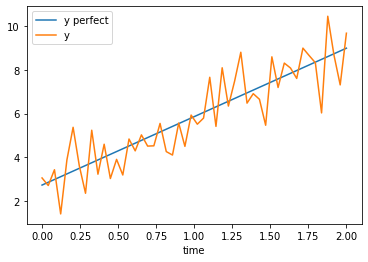

In [6]:
data.plot(x='time');

Typically, we only have access to the noisey measurments, not the true model. We can use the [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function to fit a `linear` model function to this data.

In [7]:
from scipy.optimize import curve_fit
def linear(x,m,b): return m*x+b
params,_ = curve_fit(linear,data.time,data.y)
params

array([3.17319241, 2.63879181])

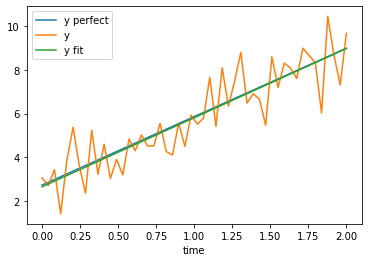

In [8]:
data['y fit'] = linear(data.time,*params)
data.plot(x='time');

Since the true model happend to be a linear model, the curve fit is nearly perfect! 